# Presentación gráfica de datos de contagios de Covid
Vamos a preparar un programa que descarge los datos referentes a contagios CoVid del repositorio oficial del Instituto de Salud Carlos III, https://cnecovid.isciii.es, vamos a trabajar con ellos y vamos a presentarlos con un par de gráficos. 

Ha obligado a jugar con muchas de las opciones la libreria Matplotlib permitiéndonos entender las múltiples posibilidades de configuración.

## Librerías

Comenzamos instalando el paquete estándar que solemos bajar en paquetes de este tipo:

In [18]:
import matplotlib
matplotlib.use('tkagg')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import numpy as np
from datetime import datetime
import seaborn as sns

Configuramos $matplotlib$ de tal manera que presente por pantalla los gráficos generados:

In [19]:
%matplotlib inline

## Descarga de los datos

Preparemos un variable con el $path$ de la $url$ en la que encontramos el repositorio de información:

In [20]:
path_datos='https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv'

Preparamos un $pandas$ con la información descargada:

In [21]:
df = pd.read_csv(path,encoding='ISO-8859-1',engine='python')

Hagamos un 'Exploratory Data Analysis' de los datos:

Encontramos estas columnas de datos:

In [12]:
df.columns

Index(['ccaa_iso', 'fecha', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_otras',
       'num_casos_prueba_desconocida'],
      dtype='object')

Y los primeras líneas, y últimas líneas...

In [14]:
df.head()

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
0,AN,2020-01-31,0,0,0,0,0
1,AR,2020-01-31,0,0,0,0,0
2,AS,2020-01-31,0,0,0,0,0
3,CB,2020-01-31,0,0,0,0,0
4,CE,2020-01-31,0,0,0,0,0


In [15]:
df.tail()

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida
2978,ML,2020-07-05,0,0,0,0,0
2979,NC,2020-07-05,0,0,0,0,0
2980,PV,2020-07-05,8,8,0,0,0
2981,RI,2020-07-05,0,0,0,0,0
2982,VC,2020-07-05,2,2,0,0,0


Vemos que nos indica una primera clave correspondiente a la comunidad sobre la que nos da el dato (es un código iso que podemos encontrar en una búsqueda fácil de internet), el número de casos, `num_casos` que podemos ver que es equivalente a la suma de los valores del resto de columnas numéricas. Estas representan las distintas pruebas de origen del positivo: `pcr`, `test_ac`, `otras` ó `desconocidas`. Adicionalmente tenemos una columna con la fecha del día correspondiente a los datos en formato `%Y-%m-%d`

Para poder trabajar mejor con el nombre de las Comunidades vamos a generar un diccionario

In [17]:
comunidades={'AN':['Andalucia',8426405],
 'AR':['Aragon',1320794],
 'AS':['Asturias',1022293],
 'CB':['Cantabria',581684],
 'CE':['Ceuta',84843],
 'CL':['Castilla y León',2408083],
 'CM':['Castilla La Mancha',2035505],
 'CN':['Islas Canarias',2207225],
 'CT':['Cataluña',7565099],
 'EX':['Extremadura',1065371],
 'GA':['Galicia',2700330],
 'IB':['Islas Baleares',1187802],
 'MC':['Murcia',1487698],
 'MD':['Madrid',6640705],
 'ML':['Melilla',84714],
 'NC':['Navarra',649966],
 'PV':['Pais Vasco',2178048],
 'RI':['Rioja',313582],
 'VC':['Valencia',4974475]}

In [11]:
set(df['ccaa_iso'])

{'AN',
 'AR',
 'AS',
 'CB',
 'CE',
 'CL',
 'CM',
 'CN',
 'CT',
 'EX',
 'GA',
 'IB',
 'MC',
 'MD',
 'ML',
 'NC',
 'PV',
 'RI',
 'VC'}

In [12]:
pob_spain=0
for com in comunidades:
    pob_spain+=comunidades[com][1]

In [13]:
df['fecha']=pd.to_datetime(df['fecha'],format='%Y-%m-%d')
df.sort_values(['fecha'],inplace=True)

In [14]:
df.set_index(['fecha','ccaa_iso'],inplace=True)

In [15]:
df.fillna(0)

num_casos  num_casos_prueba_pcr  \
fecha      ccaa_iso                                    
2020-01-31 AN                0                     0   
           VC                4                     3   
           RI                0                     0   
           PV                0                     0   
           NC                0                     0   
...                        ...                   ...   
2020-07-05 AR               14                    14   
           AN                6                     6   
           RI                0                     0   
           CT               54                    54   
           VC                2                     2   

                     num_casos_prueba_test_ac  num_casos_prueba_otras  \
fecha      ccaa_iso                                                     
2020-01-31 AN                               0                       0   
           VC                               1                       0   
           RI                               0                       0   
           PV                               0                       0   
           NC                               0                       0   
...                                       ...                     ...   
2020-07-05 AR                               0                       0   
           AN                               0                       0   
           RI                               0                       0   
           CT                               0                       0   
           VC                               0                       0   

                     num_casos_prueba_desconocida  
fecha      ccaa_iso                                
2020-01-31 AN                                   0  
           VC                                   0  
           RI                                   0  
           PV                                   0  
           NC                                   0  
...                                           ...  
2020-07-05 AR                                   0  
           AN                                   0  
           RI                                   0  
           CT                                   0  
           VC                                   0  

[2983 rows x 5 columns]

In [16]:
resumen_por_dias=df.pivot_table(index=['fecha'],values=['num_casos'],aggfunc=np.sum)

In [17]:
resumen_por_dias['casos_habitantes']=resumen_por_dias['num_casos']/pob_spain*1000000

In [18]:
resumen_por_dias

,num_casos,casos_habitantes
fecha,,
2020-01-31,8,0.170450
2020-02-01,19,0.404818
2020-02-02,13,0.276981
2020-02-03,18,0.383512
2020-02-04,13,0.276981
...,...,...
2020-07-01,592,12.613290
2020-07-02,605,12.890271
2020-07-03,398,8.479881


In [19]:
for com in comunidades.items():
    print (com[1][1])

8426405
1320794
1022293
581684
84843
2408083
2035505
2207225
7565099
1065371
2700330
1187802
1487698
6640705
84714
649966
2178048
313582
4974475


In [20]:
resultados={}
pd.options.mode.chained_assignment = None  # default='warn'
fallecidos_spain=0
for com in comunidades:
    df_aux=df.xs(com,level=1,drop_level=True)
    df_aux['Casos_habitantes']=df_aux['num_casos']/comunidades[com][1]*1000000
    resultados[com]=df_aux
pd.options.mode.chained_assignment = 'warn'


In [21]:
resultados['MD']

,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,Casos_habitantes
fecha,,,,,,
2020-01-31,4,4,0,0,0,0.602346
2020-02-01,9,9,0,0,0,1.355278
2020-02-02,6,6,0,0,0,0.903519
2020-02-03,7,7,0,0,0,1.054105
2020-02-04,3,3,0,0,0,0.451759
...,...,...,...,...,...,...
2020-07-01,50,50,0,0,0,7.529321
2020-07-02,26,26,0,0,0,3.915247
2020-07-03,38,38,0,0,0,5.722284


In [22]:
resumen_por_dias[resumen_por_dias.index>ref_date].plot()

NameError: name 'ref_date' is not defined

In [23]:
ref_date=datetime(year=2020,month=6,day=1)

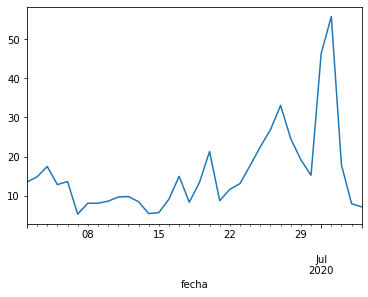

In [24]:
resultados['CT'][resultados['CT'].index>ref_date]['Casos_habitantes'].plot()

In [25]:
resultados_filtrados=resultados['CL'][resultados['CL'].index>ref_date]

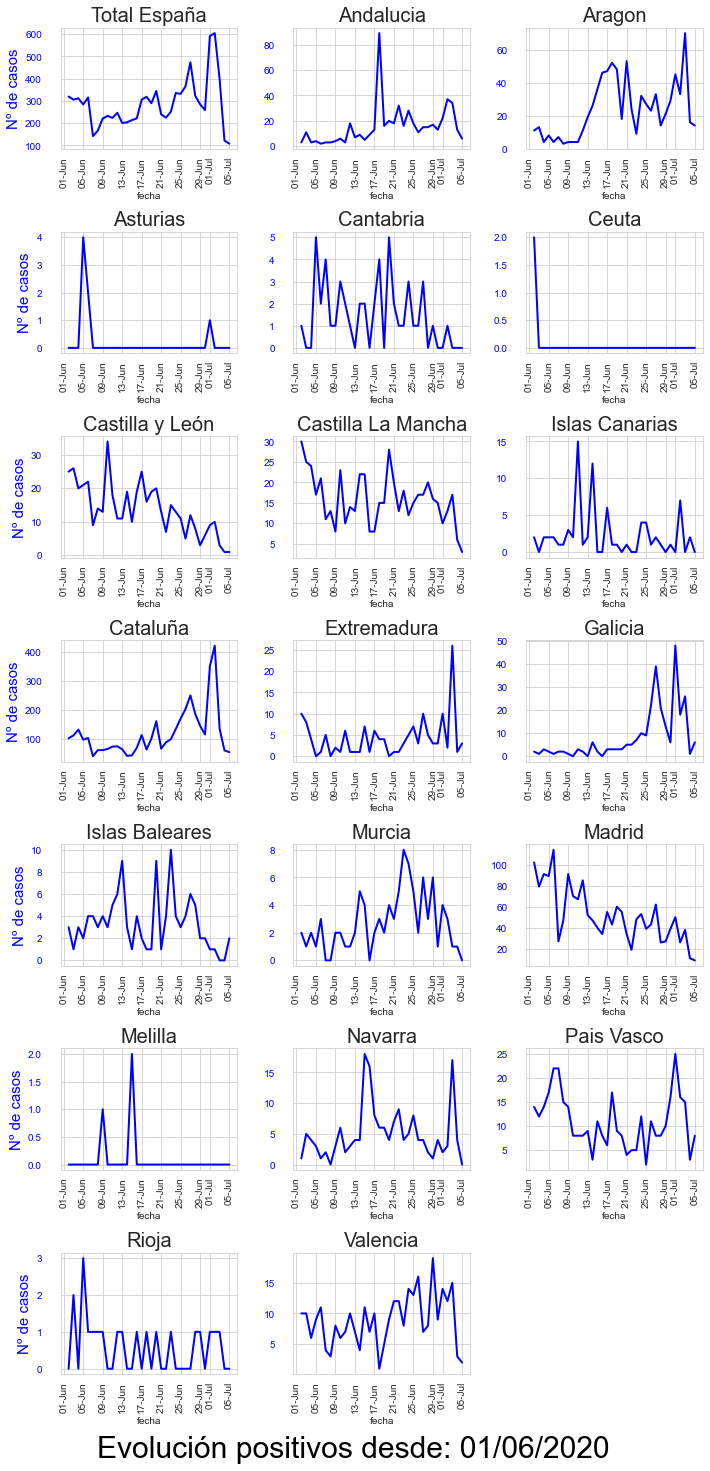

In [26]:
def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.0}'.format(value)
    
    
f = plt.figure(figsize=(10,20))
f.subplots_adjust(hspace=.5, wspace=.5)
#f.suptitle('Evolución positivos: '+datetime.today().strftime('%d/%m/%Y')
f.suptitle('Evolución positivos desde: '+ref_date.strftime('%d/%m/%Y')          
           ,fontsize=30,y=0)

#plt.text(x=0, y=0,'hola', fontsize=8, alpha=0.75)

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("RdBu_r",19))

axe=f.add_subplot(7,3,1)
resultados_filtrados=resumen_por_dias[resumen_por_dias.index>ref_date]
    #t=resultados[comunidad].index
    #data1=resultados[comunidad]['num_casos']
t=resultados_filtrados.index
data1=resultados_filtrados['num_casos']

axe.set_title('Total España',size=20)
sns.lineplot(t, data1, ax=axe,color='blue',linewidth=2)
axe.tick_params(axis='y', labelcolor='blue',size=15)


axe.set_ylabel('Nº de casos', color='blue',size=15)
axe.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    #axe.get_xaxis().set_ticks([])
    #axe.get_xaxis().set_visible(False)
axe.tick_params(axis='x',labelrotation=90)
    #axe.legend()
    #ax2.set_yscale('log')    

for i,comunidad in enumerate(comunidades):
    axe=f.add_subplot(7,3,i+2)
    resultados_filtrados=resultados[comunidad][resultados[comunidad].index>ref_date]
    #t=resultados[comunidad].index
    #data1=resultados[comunidad]['num_casos']
    t=resultados_filtrados.index
    data1=resultados_filtrados['num_casos']
    
    axe.set_title(comunidades[comunidad][0],size=20)
    sns.lineplot(t, data1, ax=axe,color='blue',linewidth=2)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    if (i+1) % 3 == 0 :
        axe.set_ylabel('Nº de casos', color='blue',size=15)
    else:
        axe.set_ylabel('', color='blue',size=15)
    axe.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    #axe.get_xaxis().set_ticks([])
    #axe.get_xaxis().set_visible(False)
    axe.tick_params(axis='x',labelrotation=90)
    #axe.legend()
    #ax2.set_yscale('log')
    


f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafico_muertes_com.png')

In [27]:
resumen_por_dias

,num_casos,casos_habitantes
fecha,,
2020-01-31,8,0.170450
2020-02-01,19,0.404818
2020-02-02,13,0.276981
2020-02-03,18,0.383512
2020-02-04,13,0.276981
...,...,...
2020-07-01,592,12.613290
2020-07-02,605,12.890271
2020-07-03,398,8.479881


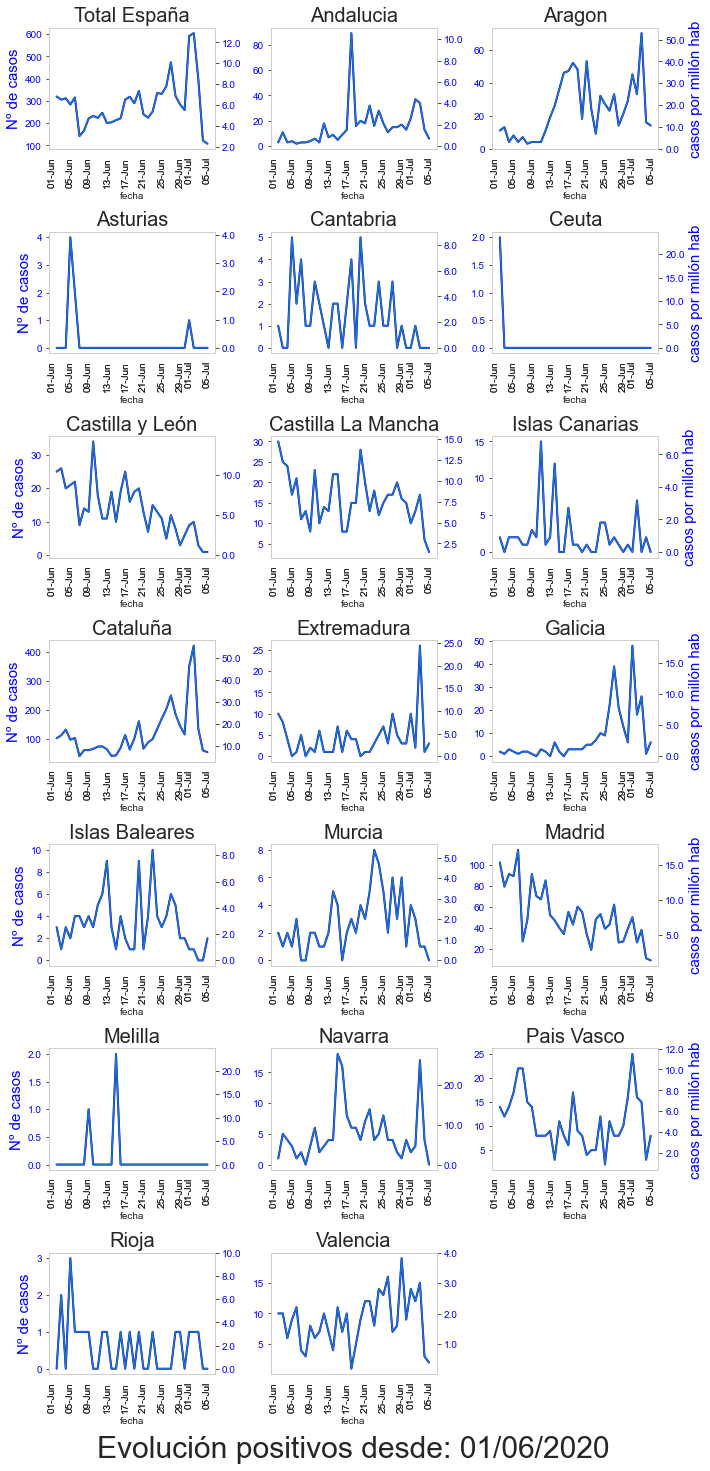

In [28]:
def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.0}'.format(value)

def format_y_2(value, tick_number):
        return  '{}'.format(value)
    
f = plt.figure(figsize=(10,20))
f.subplots_adjust(hspace=.5, wspace=.5)
#f.suptitle('Evolución positivos: '+datetime.today().strftime('%d/%m/%Y')
f.suptitle('Evolución positivos desde: '+ref_date.strftime('%d/%m/%Y')          
           ,fontsize=30,y=0)

#plt.text(x=0, y=0,'hola', fontsize=8, alpha=0.75)

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("RdBu_r",19))

axe=f.add_subplot(7,3,1)
resultados_filtrados=resumen_por_dias[resumen_por_dias.index>ref_date]
    #t=resultados[comunidad].index
    #data1=resultados[comunidad]['num_casos']
t=resultados_filtrados.index
data1=resultados_filtrados['num_casos']
data2=resultados_filtrados['casos_habitantes']
axe.grid(False)
axe.set_title('Total España',size=20)
sns.lineplot(t, data1, ax=axe,color='blue',linewidth=2)
axe.tick_params(axis='y', labelcolor='blue')

ax2 = axe.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)
color = 'tab:blue'
#ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color,label='casos habitantes')
#ax2.plot(t,data3,color='black',label='Activos')
    
#sns.lineplot(t, data2, label='Casos',ax=ax2,color=sns.color_palette('RdBu_r',7)[0],linewidth=5)
#sns.lineplot(t,data3,label='Muertes',ax=ax2,color='blue',linewidth=5)
    
#ax2.tick_params(axis='y', labelcolor=color)

ax2.set_ylabel('', color=sns.color_palette('RdBu_r',7)[0])
ax2.get_xaxis().set_visible(True)   
    
ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_y_2))
ax2.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='x',labelrotation=90)
#ax2.legend()
#ax2.set_yscale('log')
    


if i % 3 == 0 :
    axe.set_ylabel('Nº de casos', color='blue',size=15)
else:
    axe.set_ylabel('', color='blue',size=15)
axe.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    #axe.get_xaxis().set_ticks([])
    #axe.get_xaxis().set_visible(False)
axe.tick_params(axis='x',labelrotation=90)
    #axe.legend()
    #ax2.set_yscale('log')    

for i,comunidad in enumerate(comunidades):
    axe=f.add_subplot(7,3,i+2)
    #resultados_filtrados=resultados[comunidad][resultados[comunidad].index>ref_date]
    resultados_filtrados=resultados[comunidad][resultados[comunidad].index>ref_date]
    #t=resultados[comunidad].index
    #data1=resultados[comunidad]['num_casos']
    t=resultados_filtrados.index
    data1=resultados_filtrados['num_casos']
    data2=resultados_filtrados['Casos_habitantes']
    axe.grid(False)
    axe.set_title(comunidades[comunidad][0],size=20)
    #sns.barplot(x='fecha',y='Casos_habitantes',data=resultados_filtrados,ax=axe,color='blue')
    sns.lineplot(t, data1, ax=axe,color='blue',linewidth=2)
    axe.tick_params(axis='y', labelcolor='blue')
    if (i+1) % 3 == 0 :
        axe.set_ylabel('Nº de casos', color='blue',size=15)
    else:
        axe.set_ylabel('', color='blue',size=15)
    axe.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    #axe.get_xaxis().set_ticks([])
    #axe.get_xaxis().set_visible(False)
    axe.tick_params(axis='x',labelrotation=90)
    #axe.legend()
    #ax2.set_yscale('log')
    ax2 = axe.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.grid(False)
    color = 'tab:blue'
    #ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color,label='Confirmados')
    #ax2.plot(t,data3,color='black',label='Activos')
    
    #sns.lineplot(t, data2, label='Casos',ax=ax2,color=sns.color_palette('RdBu_r',7)[0],linewidth=5)
    #sns.lineplot(t,data3,label='Muertes',ax=ax2,color='blue',linewidth=5)
    
    #ax2.tick_params(axis='y', labelcolor=color)

    ax2.set_ylabel('', color=sns.color_palette('RdBu_r',7)[0])
    ax2.get_xaxis().set_visible(True)   
    if (i) % 3 == 1 :
        ax2.set_ylabel('casos por millón hab', color='blue',size=15)
    else:
        ax2.set_ylabel('')
    
    
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_y_2))
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='x',labelrotation=90)
    #ax2.legend()
    #ax2.set_yscale('log')
    


f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafico_muertes_com.png')

In [64]:
resumen_por_dias.reset_index()

,fecha,num_casos,casos_habitantes
0,2020-01-31,8,0.170450
1,2020-02-01,19,0.404818
2,2020-02-02,13,0.276981
3,2020-02-03,18,0.383512
4,2020-02-04,13,0.276981
...,...,...,...
152,2020-07-01,592,12.613290
153,2020-07-02,605,12.890271
154,2020-07-03,398,8.479881
155,2020-07-04,122,2.599360


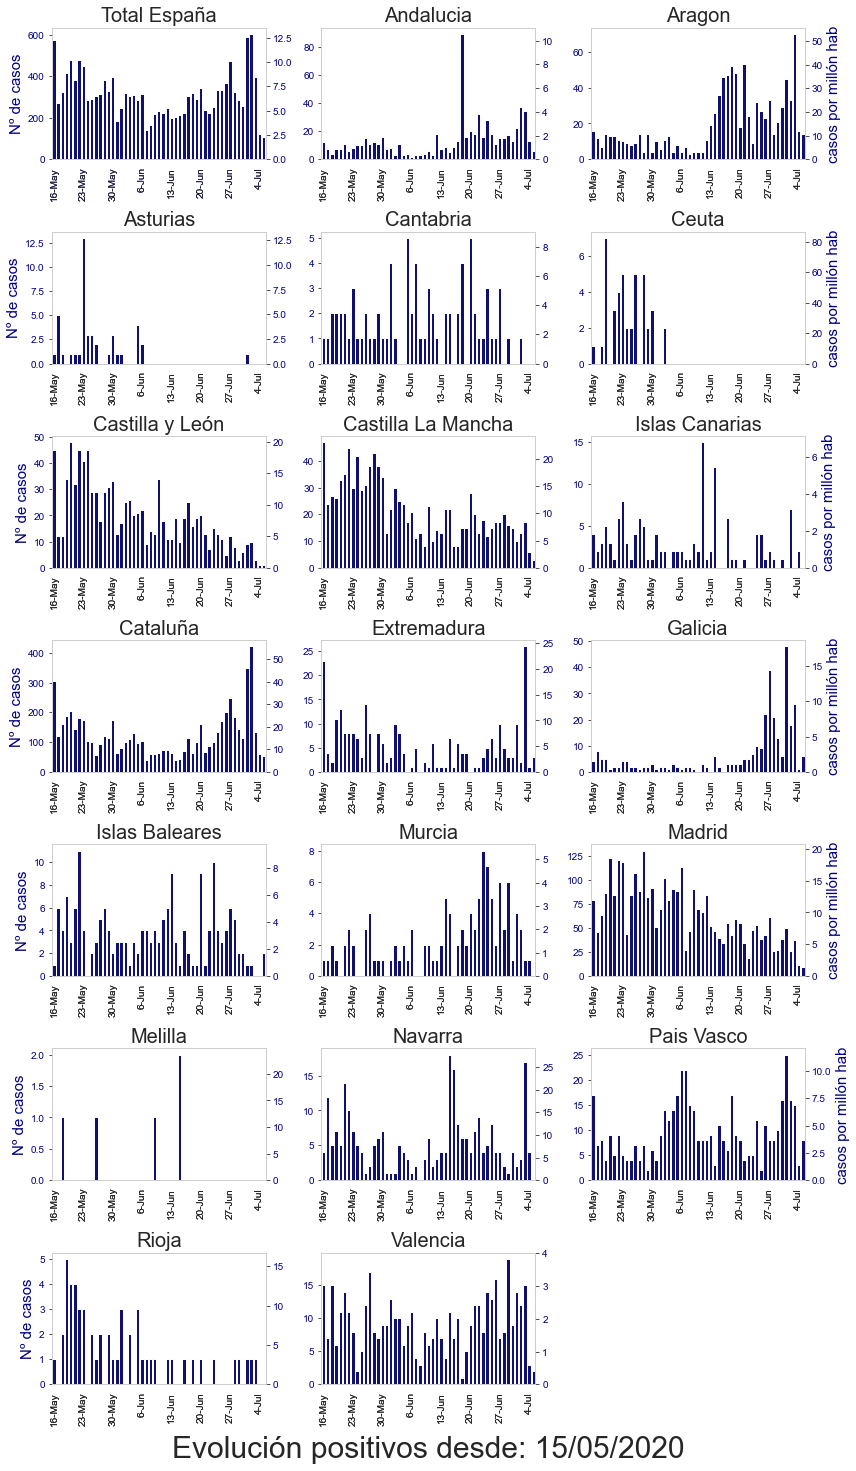

In [84]:
# Opción gráficos con barras


def format_x(value, tick_number):
        return  value

def format_x_fecha(value, tick_number):
        #print (type(value))
        #return  datetime.strftime(datetime.strptime(value[:9],'%Y-%m-%d'),'%d/%m')
        return resultados_filtrados['fecha'][int(value)].strftime('%-d-%b')
def format_y(value, tick_number):
        return  '{:.0}'.format(value)

def format_y_2(value, tick_number):
        return  '{}'.format(value)

ref_date=datetime(year=2020,month=5,day=15)    
    
f = plt.figure(figsize=(12,20))
f.subplots_adjust(hspace=.5, wspace=.5)
#f.suptitle('Evolución positivos: '+datetime.today().strftime('%d/%m/%Y')
f.suptitle('Evolución positivos desde: '+ref_date.strftime('%d/%m/%Y')          
           ,fontsize=30,y=0)
color='navy'

#plt.text(x=0, y=0,'hola', fontsize=8, alpha=0.75)

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("RdBu_r",19))

axe=f.add_subplot(7,3,1)
resultados_filtrados=resumen_por_dias[resumen_por_dias.index>ref_date].reset_index()
    #t=resultados[comunidad].index
    #data1=resultados[comunidad]['num_casos']
t=resultados_filtrados.index
data1=resultados_filtrados['num_casos']
data2=resultados_filtrados['casos_habitantes']
axe.grid(False)
axe.set_title('Total España',size=20)
#sns.lineplot(t, data1, ax=axe,color='blue',linewidth=2)
sns.barplot(x='fecha',y='num_casos',data=resultados_filtrados,ax=axe,color=color)
axe.get_xaxis().set_ticks(t[::7])

#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

#axe.xaxis.set_ticks(t[::3])
axe.tick_params(axis='y', labelcolor=color)
axe.tick_params(axis='x',labelcolor=color,labelrotation=90)
axe.set_xlabel('')

ax2 = axe.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)
#ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color,label='casos habitantes')
#ax2.plot(t,data3,color='black',label='Activos')
sns.barplot(x='fecha',y='casos_habitantes',data=resultados_filtrados,ax=ax2,color=color)
  
#sns.lineplot(t, data2, label='Casos',ax=ax2,color=sns.color_palette('RdBu_r',7)[0],linewidth=5)
#sns.lineplot(t,data3,label='Muertes',ax=ax2,color='blue',linewidth=5)
    
#ax2.tick_params(axis='y', labelcolor=color)

ax2.set_ylabel('', color=sns.color_palette('RdBu_r',7)[0])
ax2.get_xaxis().set_visible(True)   
    
ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x_fecha))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_y_2))
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x',labelrotation=90)
axe.get_xaxis().set_ticks(t[::7])
#ax2.legend()
#ax2.set_yscale('log')
    
axe.set_ylabel('Nº de casos', color=color,size=15)

#axe.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    #axe.get_xaxis().set_ticks([])
    #axe.get_xaxis().set_visible(False)
ax2.tick_params(axis='x',labelrotation=90)
ax2.set_xlabel('')
    #axe.legend()
    #ax2.set_yscale('log')    

for i,comunidad in enumerate(comunidades):
    axe=f.add_subplot(7,3,i+2)
    #resultados_filtrados=resultados[comunidad][resultados[comunidad].index>ref_date]
    resultados_filtrados=resultados[comunidad][resultados[comunidad].index>ref_date].reset_index()
    #t=resultados[comunidad].index
    #data1=resultados[comunidad]['num_casos']
    t=resultados_filtrados['fecha']
    data1=resultados_filtrados['num_casos']
    data2=resultados_filtrados['Casos_habitantes']
    axe.grid(False)
    axe.set_title(comunidades[comunidad][0],size=20)
    sns.barplot(x='fecha',y='num_casos',data=resultados_filtrados,ax=axe,color=color)
    #sns.lineplot(t, data1, ax=axe,color='blue',linewidth=2)
    axe.tick_params(axis='y', labelcolor=color)
    if (i+1) % 3 == 0 :
        axe.set_ylabel('Nº de casos', color=color,size=15)
    else:
        axe.set_ylabel('', color=color,size=15)
    axe.set_xlabel('')
    #axe.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    #axe.get_xaxis().set_ticks([])
    #axe.get_xaxis().set_visible(False)
    axe.tick_params(axis='x',color=color, labelrotation=90)
    #axe.legend()
    #ax2.set_yscale('log')
    ax2 = axe.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.grid(False)
    #ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
    #ax2.plot(t, data2, color=color,label='Confirmados')
    sns.barplot(x='fecha',y='Casos_habitantes',data=resultados_filtrados,ax=ax2,color=color)
    #ax2.plot(t,data3,color='black',label='Activos')
    
    #sns.lineplot(t, data2, label='Casos',ax=ax2,color=sns.color_palette('RdBu_r',7)[0],linewidth=5)
    #sns.lineplot(t,data3,label='Muertes',ax=ax2,color='blue',linewidth=5)
    
    #ax2.tick_params(axis='y', labelcolor=color)

    ax2.set_ylabel('', color=sns.color_palette('RdBu_r',7)[0])
    ax2.get_xaxis().set_visible(True)   
    #ax2.get_xaxis().set_ticks(t[::7])
    if (i) % 3 == 1 :
        ax2.set_ylabel('casos por millón hab', color=color,size=15)
    else:
        ax2.set_ylabel('')
    ax2.set_xlabel('')
    start, end = ax2.get_xlim()
    #start=list(resultados_filtrados['fecha'])[0]
    #end=list(resultados_filtrados['fecha'])[-1]
    ax2.xaxis.set_ticks(np.arange(0, end, 7))
    #ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    #ax2.get_xaxis().set_ticks(resultados_filtrados['fecha'][::7].values)
    
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x_fecha))
    #ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_y_2))
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.tick_params(axis='x',color=color,labelrotation=90)
    #ax2.legend()
    #ax2.set_yscale('log')
    


f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafico_muertes_com.png')

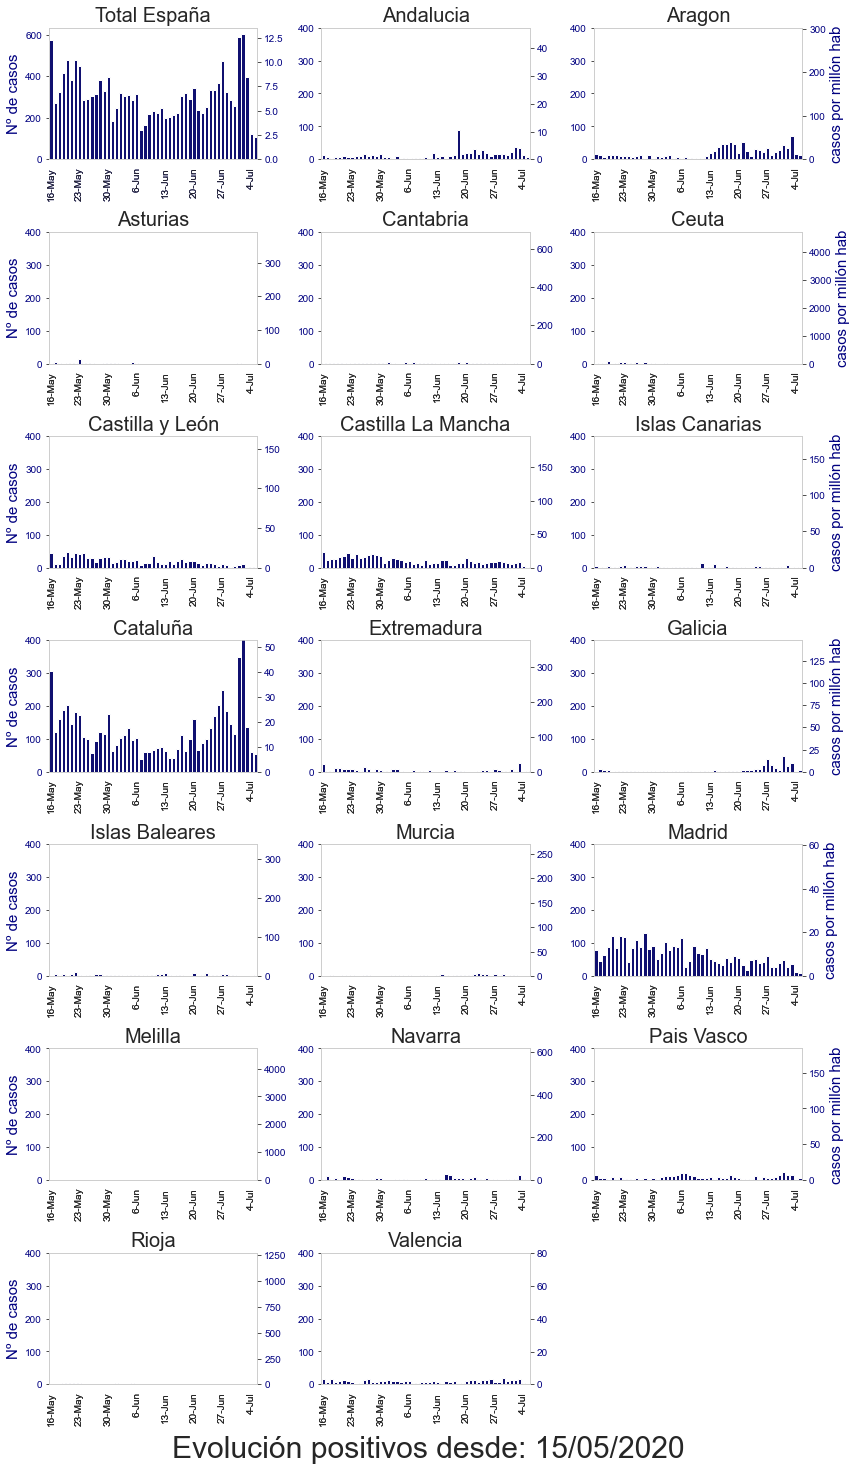

In [89]:
# Opción gráficos con barras
# y con la misma escala


def format_x(value, tick_number):
        return  value

def format_x_fecha(value, tick_number):
        #print (type(value))
        #return  datetime.strftime(datetime.strptime(value[:9],'%Y-%m-%d'),'%d/%m')
        return resultados_filtrados['fecha'][int(value)].strftime('%-d-%b')
def format_y(value, tick_number):
        return  '{:.0}'.format(value)

def format_y_2(value, tick_number):
        return  '{}'.format(value)

ref_date=datetime(year=2020,month=5,day=15)    
    
f = plt.figure(figsize=(12,20))
f.subplots_adjust(hspace=.5, wspace=.5)
#f.suptitle('Evolución positivos: '+datetime.today().strftime('%d/%m/%Y')
f.suptitle('Evolución positivos desde: '+ref_date.strftime('%d/%m/%Y')          
           ,fontsize=30,y=0)
color='navy'

#plt.text(x=0, y=0,'hola', fontsize=8, alpha=0.75)

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("RdBu_r",19))

axe=f.add_subplot(7,3,1)
resultados_filtrados=resumen_por_dias[resumen_por_dias.index>ref_date].reset_index()
    #t=resultados[comunidad].index
    #data1=resultados[comunidad]['num_casos']
t=resultados_filtrados.index
data1=resultados_filtrados['num_casos']
data2=resultados_filtrados['casos_habitantes']
axe.grid(False)
axe.set_title('Total España',size=20)
#sns.lineplot(t, data1, ax=axe,color='blue',linewidth=2)
sns.barplot(x='fecha',y='num_casos',data=resultados_filtrados,ax=axe,color=color)
axe.get_xaxis().set_ticks(t[::7])

#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

#axe.xaxis.set_ticks(t[::3])
axe.tick_params(axis='y', labelcolor=color)
axe.tick_params(axis='x',labelcolor=color,labelrotation=90)
axe.set_xlabel('')

ax2 = axe.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)
#ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color,label='casos habitantes')
#ax2.plot(t,data3,color='black',label='Activos')
sns.barplot(x='fecha',y='casos_habitantes',data=resultados_filtrados,ax=ax2,color=color)
  
#sns.lineplot(t, data2, label='Casos',ax=ax2,color=sns.color_palette('RdBu_r',7)[0],linewidth=5)
#sns.lineplot(t,data3,label='Muertes',ax=ax2,color='blue',linewidth=5)
    
#ax2.tick_params(axis='y', labelcolor=color)

ax2.set_ylabel('', color=sns.color_palette('RdBu_r',7)[0])
ax2.get_xaxis().set_visible(True)   
    
ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x_fecha))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_y_2))
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x',labelrotation=90)
axe.get_xaxis().set_ticks(t[::7])
#ax2.legend()
#ax2.set_yscale('log')
    
axe.set_ylabel('Nº de casos', color=color,size=15)

#axe.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    #axe.get_xaxis().set_ticks([])
    #axe.get_xaxis().set_visible(False)
ax2.tick_params(axis='x',labelrotation=90)
ax2.set_xlabel('')
    #axe.legend()
    #ax2.set_yscale('log')    

for i,comunidad in enumerate(comunidades):
    axe=f.add_subplot(7,3,i+2)
    #resultados_filtrados=resultados[comunidad][resultados[comunidad].index>ref_date]
    resultados_filtrados=resultados[comunidad][resultados[comunidad].index>ref_date].reset_index()
    #t=resultados[comunidad].index
    #data1=resultados[comunidad]['num_casos']
    t=resultados_filtrados['fecha']
    data1=resultados_filtrados['num_casos']
    data2=resultados_filtrados['Casos_habitantes']
    axe.grid(False)
    axe.set_title(comunidades[comunidad][0],size=20)
    axe.set_ylim(ymin=0,ymax=400)
    sns.barplot(x='fecha',y='num_casos',data=resultados_filtrados,ax=axe,color=color)
    #sns.lineplot(t, data1, ax=axe,color='blue',linewidth=2)
    axe.tick_params(axis='y', labelcolor=color)
    if (i+1) % 3 == 0 :
        axe.set_ylabel('Nº de casos', color=color,size=15)
    else:
        axe.set_ylabel('', color=color,size=15)
    axe.set_xlabel('')
    #axe.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    #axe.get_xaxis().set_ticks([])
    #axe.get_xaxis().set_visible(False)
    axe.tick_params(axis='x',color=color, labelrotation=90)
    #axe.legend()
    #ax2.set_yscale('log')
    ax2 = axe.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.grid(False)
    ax2.set_ylim(ymin=0, ymax=400/comunidades[comunidad][1]*1000000)
    #ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
    #ax2.plot(t, data2, color=color,label='Confirmados')
    sns.barplot(x='fecha',y='Casos_habitantes',data=resultados_filtrados,ax=ax2,color=color)
    #ax2.plot(t,data3,color='black',label='Activos')
    
    #sns.lineplot(t, data2, label='Casos',ax=ax2,color=sns.color_palette('RdBu_r',7)[0],linewidth=5)
    #sns.lineplot(t,data3,label='Muertes',ax=ax2,color='blue',linewidth=5)
    
    #ax2.tick_params(axis='y', labelcolor=color)

    ax2.set_ylabel('', color=sns.color_palette('RdBu_r',7)[0])
    ax2.get_xaxis().set_visible(True)   
    #ax2.get_xaxis().set_ticks(t[::7])
    if (i) % 3 == 1 :
        ax2.set_ylabel('casos por millón hab', color=color,size=15)
    else:
        ax2.set_ylabel('')
    ax2.set_xlabel('')
    start, end = ax2.get_xlim()
    #start=list(resultados_filtrados['fecha'])[0]
    #end=list(resultados_filtrados['fecha'])[-1]
    ax2.xaxis.set_ticks(np.arange(0, end, 7))
    #ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    #ax2.get_xaxis().set_ticks(resultados_filtrados['fecha'][::7].values)
    
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x_fecha))
    #ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_y_2))
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.tick_params(axis='x',color=color,labelrotation=90)
    #ax2.legend()
    #ax2.set_yscale('log')
    


f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafico_muertes_com.png')

KeyError: 'Fallecidos_por_hab'

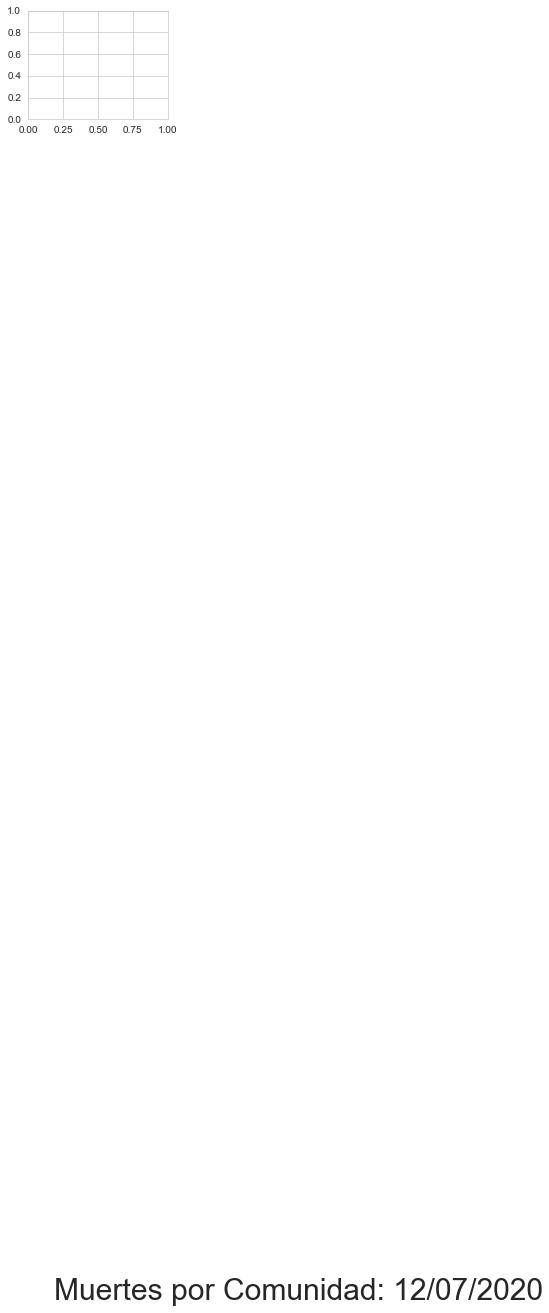

In [38]:
def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.3%}'.format(value)
    
    
f = plt.figure(figsize=(10,20))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Muertes por Comunidad: '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("RdBu_r",19))

for i,comunidad in enumerate(comunidades):
    axe=f.add_subplot(7,3,i+1)
    t=resultados[comunidad].index
    data1=resultados[comunidad]['Fallecidos_por_hab']
    data2=resultados[comunidad]['CASOS']
    data3=resultados[comunidad]['Fallecidos']
    axe.set_title(comunidades[comunidad][0],size=20)
    sns.lineplot(t, data1, ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    if i % 3 == 0 :
        axe.set_ylabel('Fallecidos por habitantes', color='blue',size=15)
    else:
        axe.set_ylabel('', color='blue',size=15)
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.get_xaxis().set_ticks([])
    axe.get_xaxis().set_visible(False)
    
    ax2 = axe.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax2.grid(False)
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    #color = 'tab:blue'
    #ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
    #ax2.plot(t, data2, color=color,label='Confirmados')
    #ax2.plot(t,data3,color='black',label='Activos')
    
    #sns.lineplot(t, data2, label='Casos',ax=ax2,color=sns.color_palette('RdBu_r',7)[0],linewidth=5)
    sns.lineplot(t,data3,label='Muertes',ax=ax2,color='blue',linewidth=5)
    
    #ax2.tick_params(axis='y', labelcolor=color)

    ax2.set_ylabel('', color=sns.color_palette('RdBu_r',7)[0])
    ax2.get_xaxis().set_visible(True)   
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='x',labelrotation=90)
    ax2.legend()
    #ax2.set_yscale('log')
    
f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafico_muertes_com.png')

In [ ]:
resultados_filtrados=resultados[comunidad][resultados[comunidad].index>ref_date].reset_index()


In [90]:
def format_x(value, tick_number):
    return  datetime.fromordinal(int(value)).strftime('%d-%b')

def format_y(value, tick_number):
    return '{0:.0f} por millón\n casos'.format(value*1000000)
    #return value
def grafico_temporal (datos,category,scale='linear'):
    res_aux={}
    color_pais={}
    current_palette = sns.color_palette('deep',20)
    res_aux=datos
    for i,com in enumerate(datos):
        color_pais[com]=current_palette[i]

    plt.rc('figure', facecolor='black')
    plt.style.use('dark_background')
    f = plt.figure(figsize=(8,12))
    ax1 = f.add_subplot(111)
    ax1.set_title(category,size=20)
    #f.subplots_adjust(hspace=.5, wspace=0.5)
    sns.set(palette='deep')
    #sns.set_style("whitegrid")
    #current_palette = sns.color_palette('husl',12)
    sns.set_palette(current_palette)
    for i in res_aux:
        t=res_aux[i].index
        
        p=sns.lineplot(t, res_aux[i][category], label=comunidades[i][0],ax=ax1,linewidth=4,color=color_pais[i])
        p.text(t[-1],res_aux[i][category].iloc[-1],' '+comunidades[i][0],
               horizontalalignment='left', size='medium', color='white')
        #ylabels=['{} por millón'.format(x) for x in p.get_yticks()*1000000]
        #p.set_yticklabels(ylabels)
        #ax1.get_xaxis().set_visible(True) 
    
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_y))
    ax1.tick_params(axis='y',direction='out',labelrotation=0,labelsize=15)
    ax1.tick_params(axis='x',direction='out',labelrotation=0,labelsize=10)
    #ax1.set_xlabel('Fecha', color='white',size=15)
    #ax1.set_ylabel('Tasa de '+category, color='white',size=15)
    y_axis = ax1.axes.get_yaxis().get_label().set_visible(False)
    x_axis = ax1.axes.get_xaxis().get_label().set_visible(False)
    #ax1.legend(prop={'size':10},loc=6)
    ax1.legend().set_visible(False)
    ax1.grid(False,which='both')
    #ax1.get_xaxis().set_visible(False)
    #ax1.get_yaxis().set_visible(False)
    #p.legend.remove()
    #ax1.set_yscale(scale)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    path='graficos/'
    nombre_fichero=path+category+'_'+'_'+str(scale)+'.png'
    plt.tight_layout()
    f.savefig(nombre_fichero)
    return 

In [92]:
resultados

{'AN':             num_casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
 fecha                                                                   
 2020-01-31          0                     0                         0   
 2020-02-01          2                     2                         0   
 2020-02-02          2                     1                         1   
 2020-02-03          1                     1                         0   
 2020-02-04          1                     0                         1   
 ...               ...                   ...                       ...   
 2020-07-01         22                    22                         0   
 2020-07-02         37                    37                         0   
 2020-07-03         34                    34                         0   
 2020-07-04         13                    13                         0   
 2020-07-05          6                     6                         0   
 
             num_casos_prueba_

In [ ]:
resultados_filtrados=resultados[comunidad][resultados[comunidad].index>ref_date].reset_index()


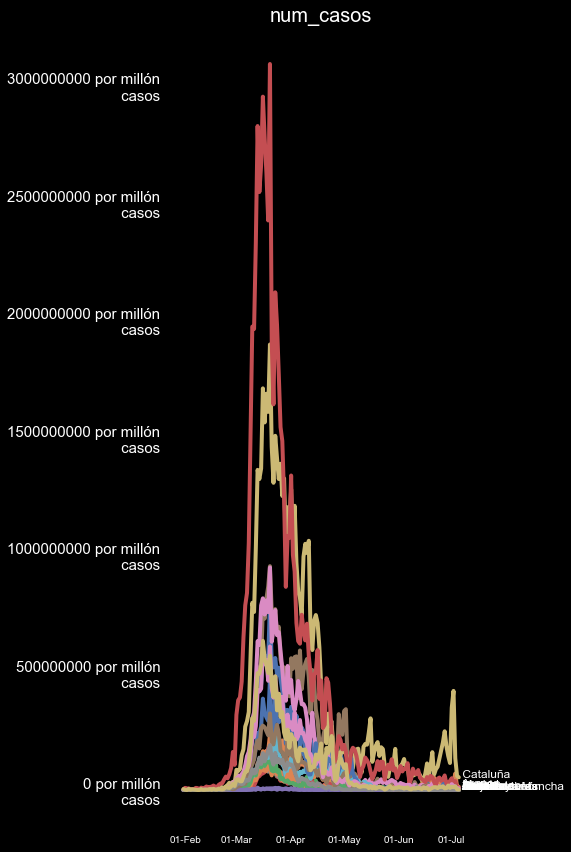

In [93]:
grafico_temporal(resultados,'num_casos')

In [104]:
#temporal con limite de fechas 

def format_x(value, tick_number):
    return  datetime.fromordinal(int(value)).strftime('%d-%b')

def format_y(value, tick_number):
    return '{0:.0f} casos\n por millón'.format(value)
    #return value
def grafico_temporal_v2 (datos,desde_fecha,category,scale='linear'):
    res_aux={}
    color_pais={}
    current_palette = sns.color_palette('deep',20)
    res_aux=datos
    for i,com in enumerate(datos):
        color_pais[com]=current_palette[i]

    plt.rc('figure', facecolor='black')
    plt.style.use('dark_background')
    f = plt.figure(figsize=(8,12))
    ax1 = f.add_subplot(111)
    ax1.set_title(category,size=20)
    #f.subplots_adjust(hspace=.5, wspace=0.5)
    sns.set(palette='deep')
    #sns.set_style("whitegrid")
    #current_palette = sns.color_palette('husl',12)
    sns.set_palette(current_palette)
    for i in res_aux:
        
        t=res_aux[i][res_aux[i].index>desde_fecha].index
        
        p=sns.lineplot(t, res_aux[i][res_aux[i].index>desde_fecha][category], 
                       label=comunidades[i][0],ax=ax1,linewidth=4,color=color_pais[i])
        p.text(t[-1],res_aux[i][category].iloc[-1],' '+comunidades[i][0],
               horizontalalignment='left', size='medium', color='white')
        #ylabels=['{} por millón'.format(x) for x in p.get_yticks()*1000000]
        #p.set_yticklabels(ylabels)
        #ax1.get_xaxis().set_visible(True) 
    
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(format_y))
    ax1.tick_params(axis='y',direction='out',labelrotation=0,labelsize=15)
    ax1.tick_params(axis='x',direction='out',labelrotation=0,labelsize=10)
    #ax1.set_xlabel('Fecha', color='white',size=15)
    #ax1.set_ylabel('Tasa de '+category, color='white',size=15)
    y_axis = ax1.axes.get_yaxis().get_label().set_visible(False)
    x_axis = ax1.axes.get_xaxis().get_label().set_visible(False)
    #ax1.legend(prop={'size':10},loc=6)
    ax1.legend().set_visible(False)
    ax1.grid(False,which='both')
    #ax1.get_xaxis().set_visible(False)
    #ax1.get_yaxis().set_visible(False)
    #p.legend.remove()
    #ax1.set_yscale(scale)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    path='graficos/'
    nombre_fichero=path+category+'_'+'_'+str(scale)+'.png'
    plt.tight_layout()
    f.savefig(nombre_fichero)
    return 

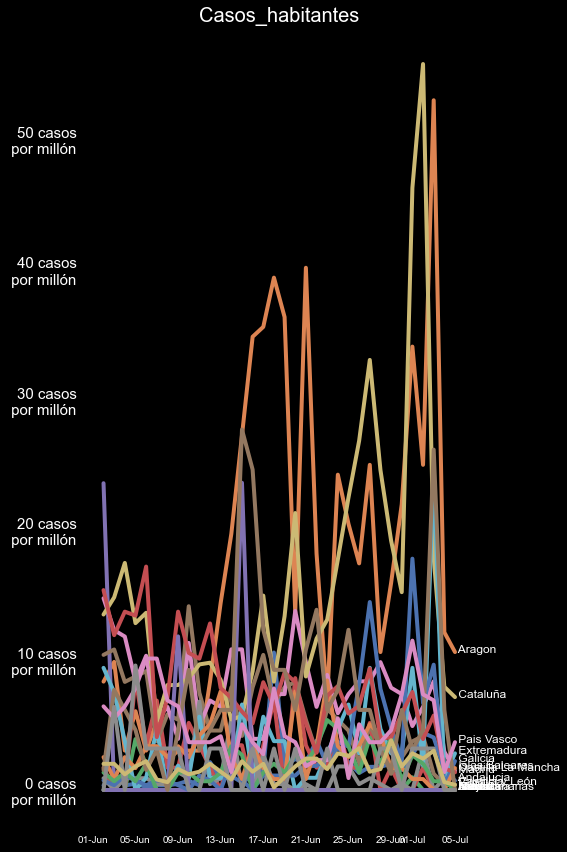

In [105]:
grafico_temporal_v2(resultados,datetime(year=2020,month=6,day=1),'Casos_habitantes')

In [281]:
def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')


In [120]:
ratio_max=0
for i, com in enumerate(comunidades):
    df_data=resultados[com][resultados[com].index > desde_fecha]
    print (df_data['Casos_habitantes'].replace(np.inf,np.nan).max() > ratio_max)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


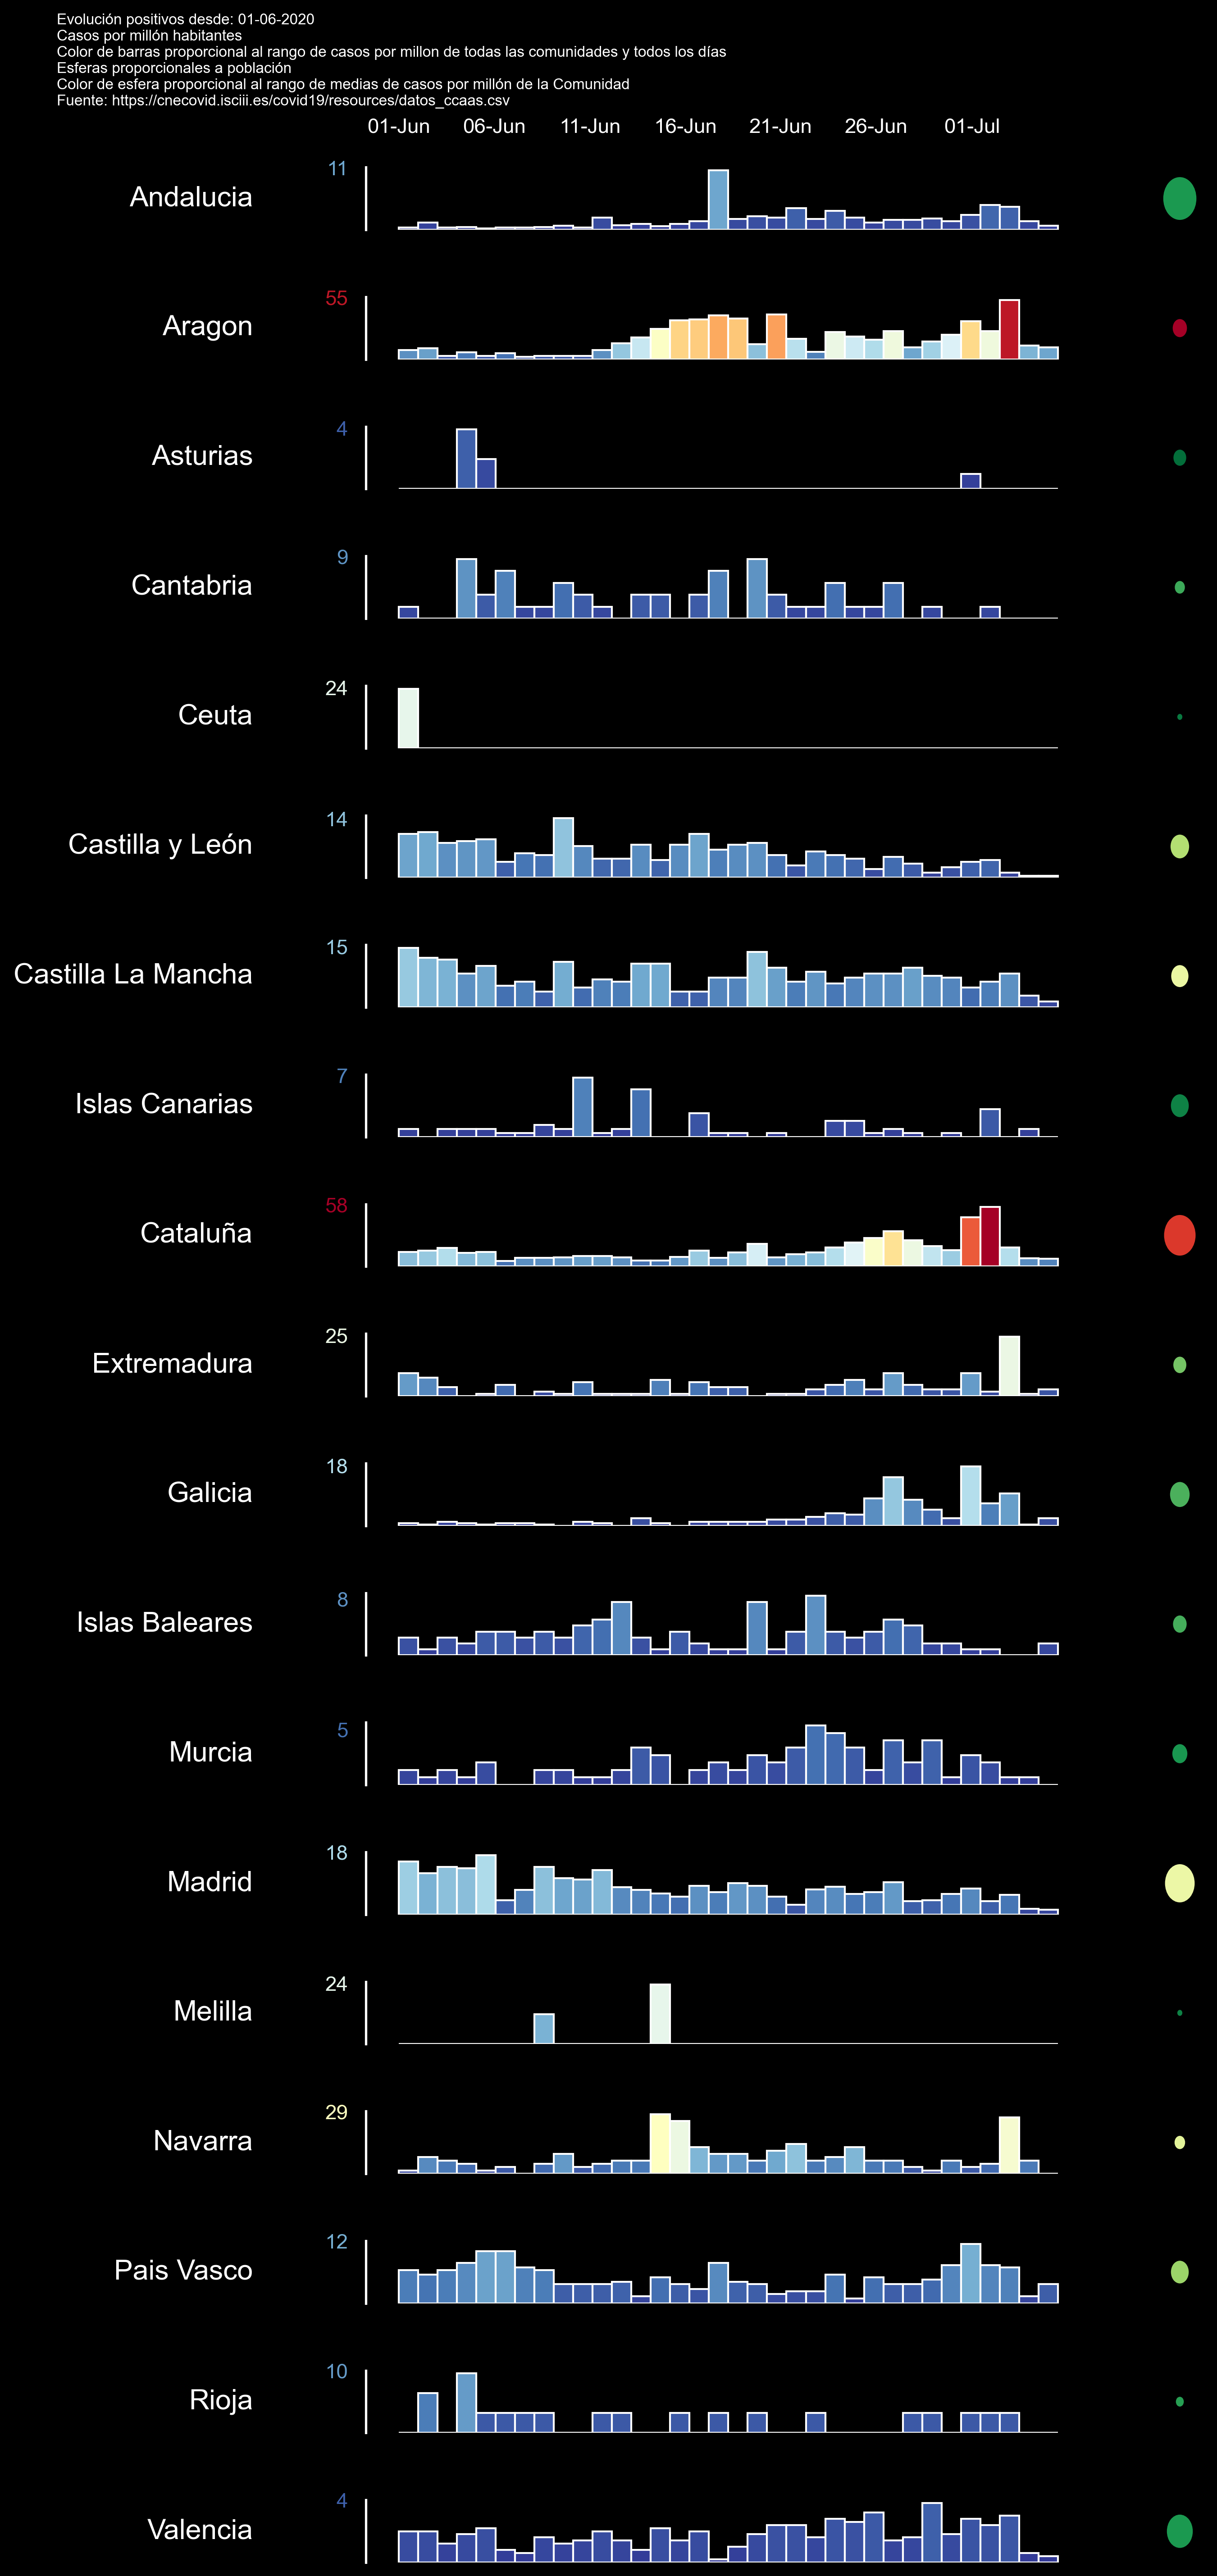

In [286]:
# Set canvas background color the same as axes
#mean_ratio=0.001
plt.rc('figure', facecolor='black')
plt.style.use('dark_background')
plt.ion()

# set constrianed_layout as True to avoid axes overlap
#fig = plt.figure(figsize=(10,20 ), dpi=300, constrained_layout=True)
fig = plt.figure(figsize=(10,20),dpi=300)
fig.suptitle('''Evolución positivos desde: {} \nCasos por millón habitantes
Color de barras proporcional al rango de casos por millon de todas las comunidades y todos los días
Esferas proporcionales a población
Color de esfera proporcional al rango de medias de casos por millón de la Comunidad
Fuente: https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv'''
             .format(desde_fecha.strftime('%d-%m-%Y'))        
           ,fontsize=8,x=.05,y=1,ha='left')
  
# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=21, ncols=10)
desde_fecha=datetime(year=2020,month=6,day=1)


ax=fig.add_subplot(gs[0,1:8])
ax.bar(resultados['MD'][resultados['MD'].index >= desde_fecha].index,0,color='xkcd:black',
       edgecolor='black',width=0.5,align='edge')
ax.set_facecolor('xkcd:black')
ax.spines['bottom'].set_visible(False)  
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_visible(False)  
ax.spines['top'].set_visible(False)

ax.grid(False,which='both')
#ax.tick_params(axis='x',direction='out',labelrotation=90)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))

ax.axes.get_yaxis().set_visible(False)
#ax.axes.get_xaxis().set_visible(False)
ax.get_xaxis().set_ticks(resultados['MD'][resultados['MD'].index >= desde_fecha].index[::5])
#ax.tick_params(axis='x',colors='black')
#ax.get_yaxis().set_ticks([])


ratio_max=0
average_com={}
color_average_com={}
max_average=0
for i, com in enumerate(comunidades):
    df_data=resultados[com][resultados[com].index >= desde_fecha]
    average_com[com]=df_data['Casos_habitantes'].mean()
    if average_com[com] > max_average:
        max_average=average_com[com]
    if df_data['Casos_habitantes'].replace(np.inf,np.nan).max() > ratio_max:
        ratio_max=df_data['Casos_habitantes'].max()
for i, com in enumerate(comunidades):
    average_com[com]/=max_average
    color_average_com[com]=cm.RdYlGn_r(average_com[com])


for i, com in enumerate(comunidades):
    #nombre comunidades
    ax1 = fig.add_subplot(gs[i+1,0])
    ax1.set_facecolor('xkcd:black')
    ax1.annotate('{}'.format(comunidades[com][0]), (0, 0.5), size=15,xycoords='axes fraction', va='center', ha='right')
    ax1.spines['bottom'].set_visible(False)  
    ax1.spines['right'].set_visible(False)  
    ax1.spines['left'].set_visible(False)  
    ax1.spines['top'].set_visible(False)
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    #ax = fig.add_subplot(19,1,i+1, ylim=(-.0001, 0.0001))
    ax = fig.add_subplot(gs[i+1, 1:8])
    
    ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
    
    df_data=resultados[com][resultados[com].index > desde_fecha]
    mean_ratio=df_data['num_casos'].mean()
    # color scheme
    # colors = cm.RdYlBu_r(resultados[com]['Fallecidos_por_hab'] / resultados[com]['Fallecidos_por_hab'].max())
    # ax.bar(resultados[com].index, df_data['Fallecidos_por_hab'] - mean_ratio, label='_1',color=colors,
    #       width=0.7, align="edge")
    
    #colors = cm.RdYlBu_r(df_data['Casos_habitantes'] / df_data['Casos_habitantes'].replace(np.inf,np.nan).max())
    colors = cm.RdYlBu_r(df_data['Casos_habitantes'] / ratio_max)
    
    ax.bar(df_data.index, df_data['Casos_habitantes'], label='_1',color=colors,
           width=1, align="edge")
    
    
    #Calculemos el color de valor maximo, para que indique el rango del valor
    color_max = colors[np.argmax(df_data['Casos_habitantes'])]
    start, end = ax.get_ylim()
    ax.get_yaxis().set_ticks([int(end)])
    
    #ax.yaxis.label.set_color(color_max)
    ax.tick_params(axis='y',colors=color_max)

    
    # customise axes
    ax.spines['bottom'].set_visible(False)  
    ax.spines['right'].set_visible(False)  
    #ax.spines['left'].set_visible(False)  
    ax.spines['top'].set_visible(False)
    ax.grid(False,which='both')
    ax.get_xaxis().set_ticks([])
    


    #ax.set_ylabel(comunidades[com][0], rotation=0, color='#e3e3e3', fontsize=10, fontweight='bold')
    
    
    
    ax2=fig.add_subplot(gs[i+1,8:9])
    circle1 = plt.Circle((0.5, 0.5), np.sqrt(comunidades[com][1]/np.pi)/5000, color=color_average_com[com])
    ax2.spines['bottom'].set_visible(False)  
    ax2.spines['right'].set_visible(False)  
    ax2.spines['left'].set_visible(False)  
    ax2.spines['top'].set_visible(False)
    ax2.set_facecolor('xkcd:black')
    #ax2.set_ylabel('', rotation=0, color='black')
    #ax2.set_xlabel('', rotation=0, color='black')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.add_artist(circle1)

plt.tight_layout()
path='graficos/'
pref='temporal_por_comunidad_hasta'
nombre_fichero=path+pref+'.png'
fig.savefig(nombre_fichero)
plt.show()

In [ ]:
# Set canvas background color the same as axes
#mean_ratio=0.001
plt.rc('figure', facecolor='black')
plt.style.use('dark_background')
#plt.ion()
# Arrange city based on latitude

# set constrianed_layout as True to avoid axes overlap
#fig = plt.figure(figsize=(2,5), dpi=300, constrained_layout=True)
fig = plt.figure(figsize=(10,20))

# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=21, ncols=10)

ax=fig.add_subplot(gs[0,1:8])
ax.bar(resultados['MD'].index,0,width=.7,align='edge',color='black')
ax.spines['bottom'].set_color('black')  
ax.spines['right'].set_color('black')  
ax.spines['left'].set_color('black')  
ax.spines['top'].set_color('black')
ax.grid(False)
ax.tick_params(axis='x',direction='out',labelrotation=90)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))

ax.axes.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(resultados['MD'].index[::7])
#ax.get_yaxis().set_ticks([])
ax1 = fig.add_subplot(gs[0,8:9])
ax1.annotate('{}'.format('Población'), (0.5, 0.5), size=15,xycoords='axes fraction', va='center', ha='center')
ax1.spines['bottom'].set_color('black')  
ax1.spines['right'].set_color('black')  
ax1.spines['left'].set_color('black')  
ax1.spines['top'].set_color('black') 
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])


for i, com in enumerate(comunidades):
    #ax = fig.add_subplot(19,1,i+1, ylim=(-.0001, 0.0001))
    ax = fig.add_subplot(gs[i+2, 1:8],ylim=(0.0,0.15))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    df_data=resultados[com]
    mean_ratio=df_data['Fallecidos_por_hab'].mean()
    # color scheme
    #colors = cm.RdYlBu_r(resultados[com]['Fallecidos_por_hab'] / resultados[com]['Fallecidos_por_hab'].max())
    #ax.bar(resultados[com].index, df_data['Fallecidos_por_hab'] - mean_ratio, label='_1',color=colors,
    #       width=0.7, align="edge")
    
    #colors = cm.RdYlBu_r(df_data['Fallecidos_por_casos'] / df_data['Fallecidos_por_casos'].replace(np.inf,np.nan).max())
    colors = cm.RdYlBu_r(df_data['Fallecidos_por_casos'] / 0.15)
    ax.bar(df_data.index, df_data['Fallecidos_por_casos'], label='_1',color=colors,
           width=1, align="edge")
    
    # customise axes
    ax.spines['bottom'].set_color('black')  
    ax.spines['right'].set_color('black')  
    ax.spines['left'].set_color('black')  
    ax.spines['top'].set_color('black') 
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(comunidades[com][0], rotation=0, color='#e3e3e3', fontsize=10, fontweight='bold')
    
    ax1 = fig.add_subplot(gs[i+2,0])
    ax1.annotate('{}'.format(comunidades[com][0]), (0.5, 0.5), size=15,xycoords='axes fraction', va='center', ha='right')
    ax1.spines['bottom'].set_color('black')  
    ax1.spines['right'].set_color('black')  
    ax1.spines['left'].set_color('black')  
    ax1.spines['top'].set_color('black') 
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    ax2=fig.add_subplot(gs[i+2,8:9])
    circle1 = plt.Circle((0.5, 0.5), np.sqrt(comunidades[com][1]/np.pi)/5000, color='blue')
    ax2.spines['bottom'].set_color('black')  
    ax2.spines['right'].set_color('black')  
    ax2.spines['left'].set_color('black')  
    ax2.spines['top'].set_color('black') 
    #ax2.set_ylabel('', rotation=0, color='black')
    #ax2.set_xlabel('', rotation=0, color='black')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.add_artist(circle1)
plt.show()

In [ ]:
resultados

In [ ]:
# Set canvas background color the same as axes
#mean_ratio=0.001
plt.rc('figure', facecolor='black')
plt.style.use('dark_background')
#plt.ion()
# Arrange city based on latitude

# set constrianed_layout as True to avoid axes overlap
#fig = plt.figure(figsize=(2,5), dpi=300, constrained_layout=True)
fig = plt.figure(figsize=(10,20))

# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=21, ncols=10)

ax=fig.add_subplot(gs[0,1:8])
ax.bar(resultados['MD'].index,0,width=.7,align='edge',color='black')
ax.spines['bottom'].set_color('black')  
ax.spines['right'].set_color('black')  
ax.spines['left'].set_color('black')  
ax.spines['top'].set_color('black')
ax.grid(False)
ax.tick_params(axis='x',direction='out',labelrotation=90)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_x))

ax.axes.get_yaxis().set_visible(False)
ax.get_xaxis().set_ticks(resultados['MD'].index[::7])
#ax.get_yaxis().set_ticks([])
ax1 = fig.add_subplot(gs[0,8:9])
ax1.annotate('{}'.format('Población'), (0.5, 0.5), size=15,xycoords='axes fraction', va='center', ha='center')
ax1.spines['bottom'].set_color('black')  
ax1.spines['right'].set_color('black')  
ax1.spines['left'].set_color('black')  
ax1.spines['top'].set_color('black') 
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])


for i, com in enumerate(comunidades):
    #ax = fig.add_subplot(19,1,i+1, ylim=(-.0001, 0.0001))
    ax = fig.add_subplot(gs[i+2, 1:8],ylim=(0.0,0.0010))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    df_data=resultados[com]
    # color scheme
    #colors = cm.RdYlBu_r(resultados[com]['Fallecidos_por_hab'] / resultados[com]['Fallecidos_por_hab'].max())
    #ax.bar(resultados[com].index, df_data['Fallecidos_por_hab'] - mean_ratio, label='_1',color=colors,
    #       width=0.7, align="edge")
    
    #colors = cm.RdYlBu_r(df_data['Fallecidos_por_casos'] / df_data['Fallecidos_por_casos'].replace(np.inf,np.nan).max())
    #colors = cm.RdYlBu_r(colores[:,i])
    
    mean_ratio=df_data['Ratio_Casos_ayer'].replace([np.inf, -np.inf], np.NaN).mean()
    stadev=df_data['Ratio_Casos_ayer'].replace([np.inf, -np.inf], np.NaN).std()
    maximo=df_data['Ratio_Casos_ayer'].replace([np.inf],0).replace([-np.inf],-0).max()
    minimo=df_data['Ratio_Casos_ayer'].replace([np.inf],0).replace([-np.inf],-0).min()
    rango_colores=(df_data['Ratio_Casos_ayer'].replace([np.inf],0)-minimo)/(maximo-minimo)
    colors = cm.RdYlBu_r(rango_colores)
    
    ax.bar(df_data.index, df_data['Fallecidos_por_hab'], label='_1',color=colors,
           width=1, align="edge")
    
    # customise axes
    ax.spines['bottom'].set_color('black')  
    ax.spines['right'].set_color('black')  
    ax.spines['left'].set_color('black')  
    ax.spines['top'].set_color('black') 
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_ylabel(comunidades[com][0], rotation=0, color='#e3e3e3', fontsize=10, fontweight='bold')
    
    ax1 = fig.add_subplot(gs[i+2,0])
    ax1.annotate('{}'.format(comunidades[com][0]), (0.5, 0.5), size=15,xycoords='axes fraction', va='center', ha='right')
    ax1.spines['bottom'].set_color('black')  
    ax1.spines['right'].set_color('black')  
    ax1.spines['left'].set_color('black')  
    ax1.spines['top'].set_color('black') 
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])
    
    ax2=fig.add_subplot(gs[i+2,8:9])
    circle1 = plt.Circle((0.5, 0.5), np.sqrt(comunidades[com][1]/np.pi)/5000, color='blue')
    ax2.spines['bottom'].set_color('black')  
    ax2.spines['right'].set_color('black')  
    ax2.spines['left'].set_color('black')  
    ax2.spines['top'].set_color('black') 
    #ax2.set_ylabel('', rotation=0, color='black')
    #ax2.set_xlabel('', rotation=0, color='black')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.add_artist(circle1)
plt.show()

In [ ]:
maximo=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],0).replace([-np.inf],-0).max()
minimo=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],0).replace([-np.inf],-0).min()
rango_colores=(resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],0)-minimo)/(maximo-minimo)


In [ ]:
minimo

In [ ]:
rango_colores

In [ ]:
colores=np.ndarray(shape=(len(resultados['MD'].index),len(comunidades)), dtype=float, order='F')

In [ ]:
for i,dia in enumerate(resultados['MD'].index):
    for j,com in enumerate(comunidades):
        colores[i,j]=resultados[com].loc[dia.strftime('%Y-%m-%d')]['Ratio_Casos_ayer']

In [ ]:
for i,dia in enumerate(resultados['MD'].index):
    colores[i,:]=colores[i,:]/colores[i,:].max()

In [ ]:
colores=np.nan_to_num(colores)

In [ ]:
resultados['MD']['Ratio_Casos_ayer'] / resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],0).abs().max()

In [ ]:
mean_ratio=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf, -np.inf], np.NaN).mean()
stadev=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf, -np.inf], np.NaN).std()

In [ ]:
maximo=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],1).replace([-np.inf],-1).max()
minimo=resultados['MD']['Ratio_Casos_ayer'].replace([np.inf],1).replace([-np.inf],-1).min()

In [ ]:
(resultados['MD']['Ratio_Casos_ayer']-mean_ratio)/stadev

In [ ]:
mean_ratio

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips

In [ ]:
resultados_filtrados.reset_index()

In [ ]:
t

In [48]:
t[1]

1